<a href="https://colab.research.google.com/github/ingenziart/sokrab/blob/main/netflix_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**import libraries**

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np




In [69]:
#extract datasets

datasets=pd.read_csv("netflix.csv")


In [70]:
datasets.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [71]:
datasets.shape

(8807, 12)

In [72]:
datasets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [73]:
# missing values

datasets.isnull().sum()

,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


<function matplotlib.pyplot.show(close=None, block=None)>

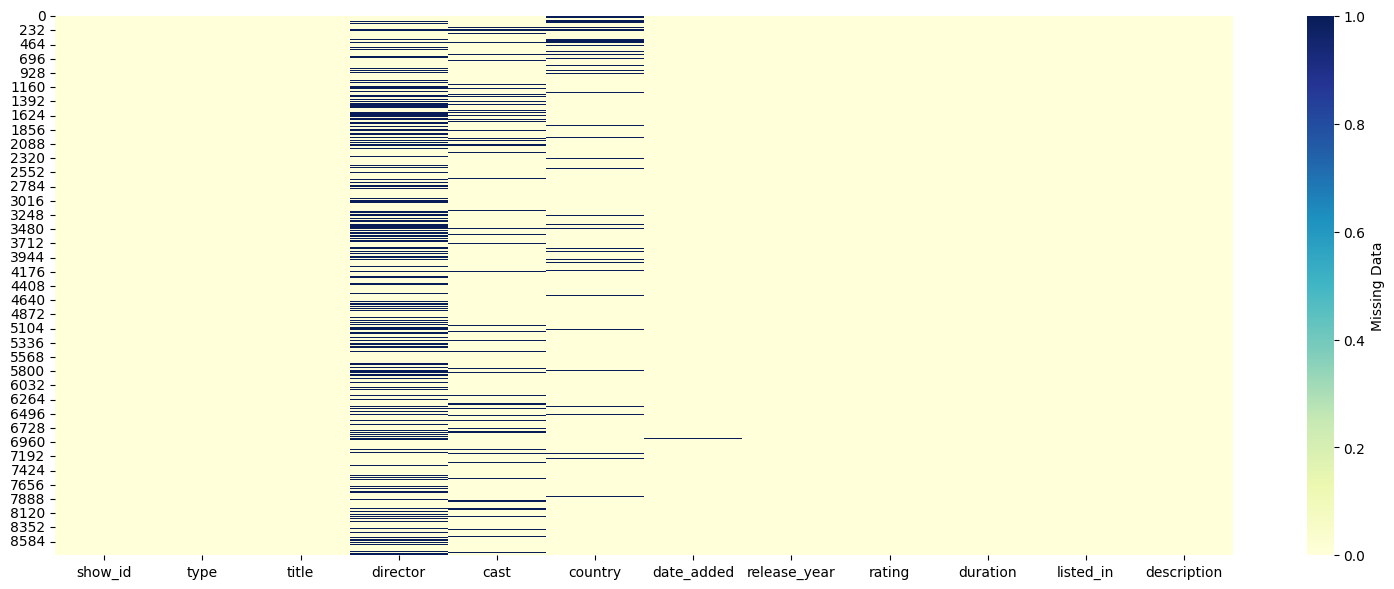

In [74]:
plt.figure(figsize=(19,7))
sns.heatmap(datasets.isna(),cmap="YlGnBu",cbar_kws={'label': 'Missing Data'})
plt.show



In [76]:
#replace the nan values by unknown
datasets[["director","cast","country"]]=datasets[["director","cast","country"]].replace(np.nan,"UNKNOWN")

In [77]:
datasets.isnull().sum()

,0
show_id,0
type,0
title,0
director,0
cast,0
country,0
date_added,10
release_year,0
rating,4
duration,3


<function matplotlib.pyplot.show(close=None, block=None)>

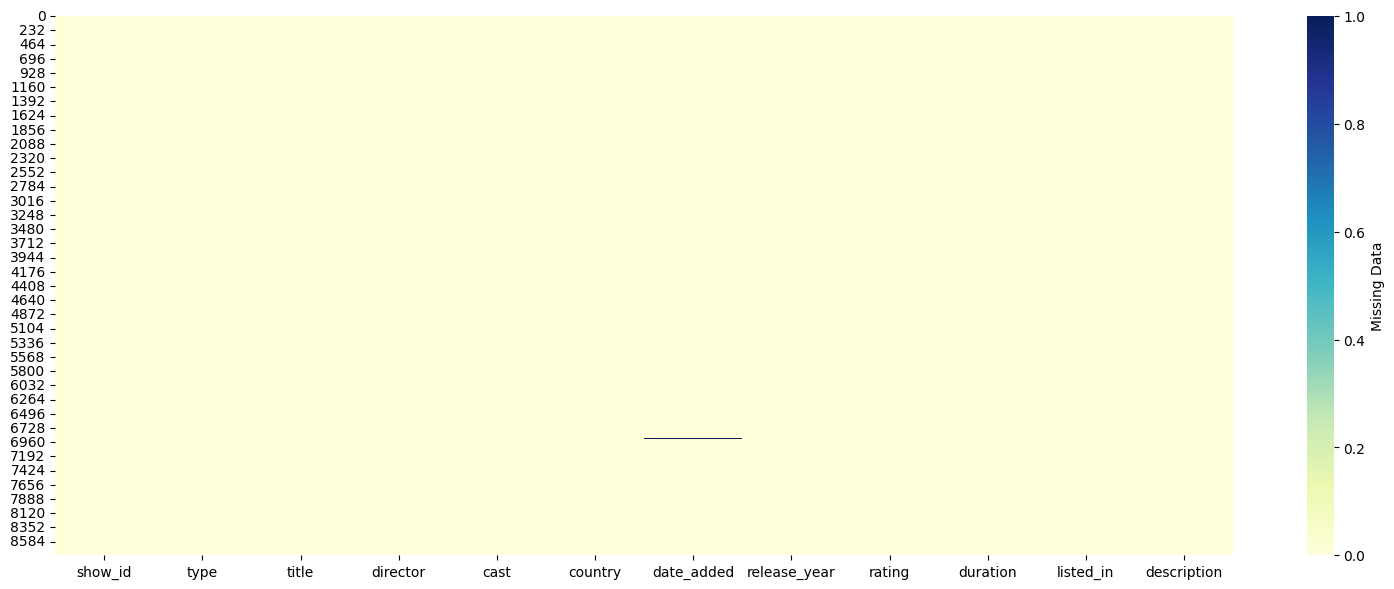

In [78]:
plt.figure(figsize=(19,7))
sns.heatmap(datasets.isna(),cmap="YlGnBu",cbar_kws={'label': 'Missing Data'})
plt.show

In [79]:
datasets.nunique()

,0
show_id,8807
type,2
title,8807
director,4529
cast,7693
country,749
date_added,1767
release_year,74
rating,17
duration,220


In [96]:
#grouping using rating to chech anomolous

datasets.groupby(by="rating").count()


,show_id,type,title,director,cast,country,date_added,release_year,duration,listed_in,description
rating,,,,,,,,,,,
66 min,1,1,1,1,1,1,1,1,1,1,1
74 min,1,1,1,1,1,1,1,1,1,1,1
84 min,1,1,1,1,1,1,1,1,1,1,1
G,41,41,41,41,41,41,41,41,41,41,41
NC-17,3,3,3,3,3,3,3,3,3,3,3
NR,80,80,80,80,80,80,80,80,80,80,80
PG,287,287,287,287,287,287,287,287,287,287,287
PG-13,490,490,490,490,490,490,490,490,490,490,490
R,799,799,799,799,799,799,799,799,799,799,799


In [81]:
datasets.isnull().sum()

,0
show_id,0
type,0
title,0
director,0
cast,0
country,0
date_added,10
release_year,0
rating,4
duration,3


In [84]:
datasets[["date_added","rating","duration"]]=datasets[["date_added","rating","duration"]].replace(np.nan,"UNknown")

In [85]:
datasets.isnull().sum()

,0
show_id,0
type,0
title,0
director,0
cast,0
country,0
date_added,0
release_year,0
rating,0
duration,0


In [86]:
datasets.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,UNKNOWN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,UNKNOWN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",UNKNOWN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,UNKNOWN,UNKNOWN,UNKNOWN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,UNKNOWN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


<function matplotlib.pyplot.show(close=None, block=None)>

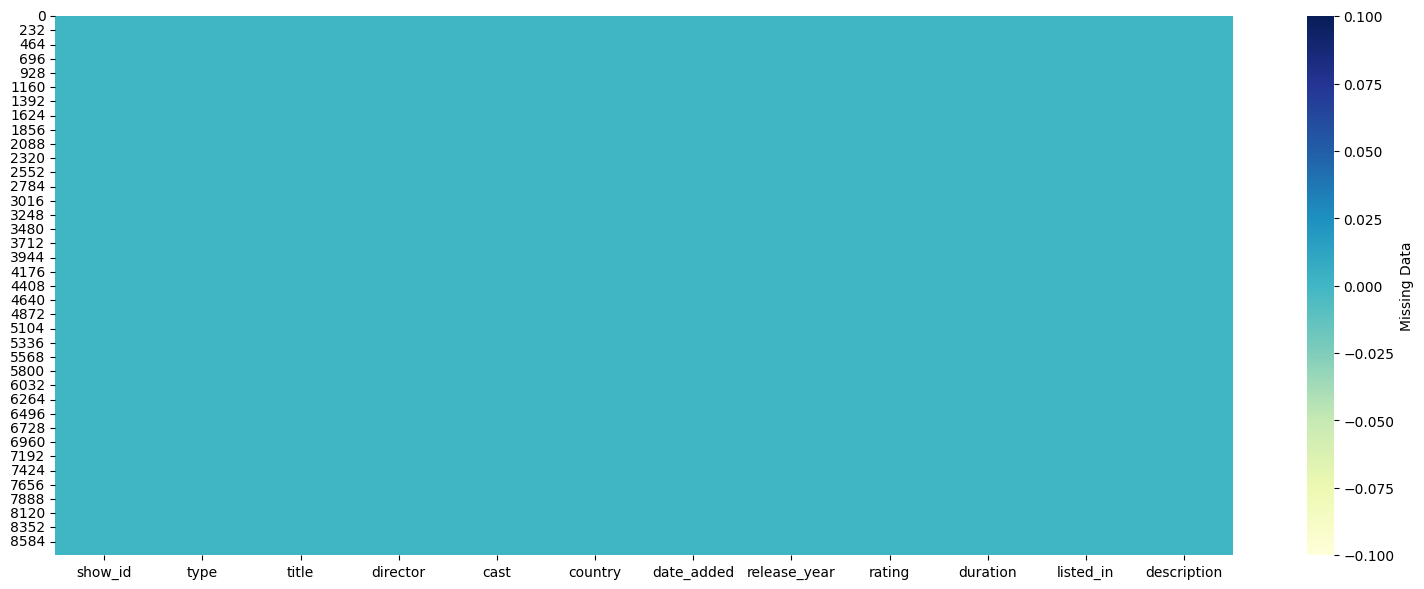

In [87]:
#visualize the missing value

plt.figure(figsize=(19,7))
sns.heatmap(datasets.isna(),cmap="YlGnBu",cbar_kws={'label': 'Missing Data'})
plt.show





In [88]:
datasets.groupby(by="rating").count()

,show_id,type,title,director,cast,country,date_added,release_year,duration,listed_in,description
rating,,,,,,,,,,,
66 min,1,1,1,1,1,1,1,1,1,1,1
74 min,1,1,1,1,1,1,1,1,1,1,1
84 min,1,1,1,1,1,1,1,1,1,1,1
G,41,41,41,41,41,41,41,41,41,41,41
NC-17,3,3,3,3,3,3,3,3,3,3,3
NR,80,80,80,80,80,80,80,80,80,80,80
PG,287,287,287,287,287,287,287,287,287,287,287
PG-13,490,490,490,490,490,490,490,490,490,490,490
R,799,799,799,799,799,799,799,799,799,799,799


In [95]:
def anomolous_detection(frame):
  if ("min" in str(frame['rating'])):
    frame["duration"]=frame["rating"]
    frame["rating"]=np.nan
  return frame

datasets.apply(anomolous_detection,axis=1)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,UNKNOWN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,UNKNOWN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",UNKNOWN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,UNKNOWN,UNKNOWN,UNKNOWN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,UNKNOWN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,UNKNOWN,UNKNOWN,UNKNOWN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


<Axes: title={'center': 'type of movie'}, xlabel='type', ylabel='count'>

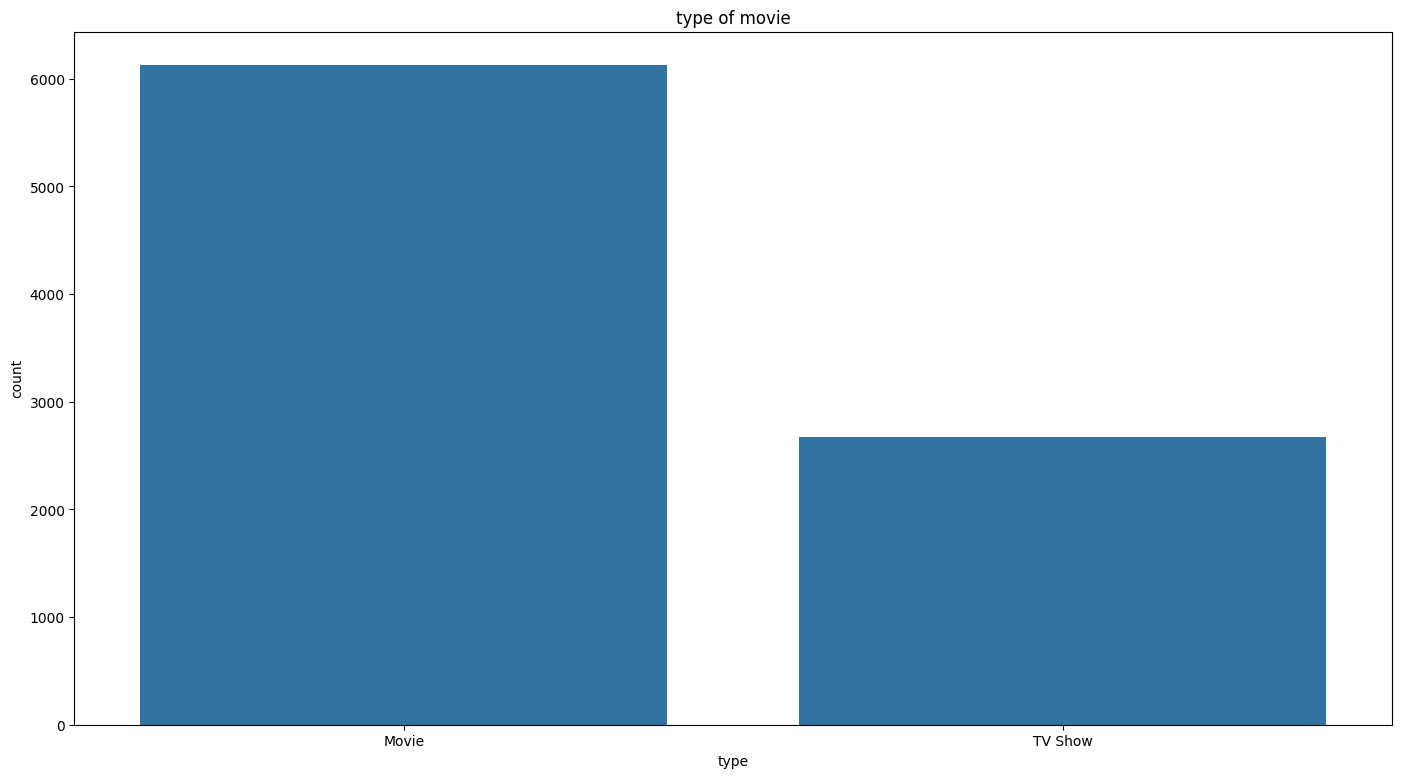

In [99]:
#vizualization

plt.figure(figsize=(17,9))
plt.title("type of movie")
plt.show
sns.countplot(x="type", data=datasets)

<Axes: ylabel='count'>

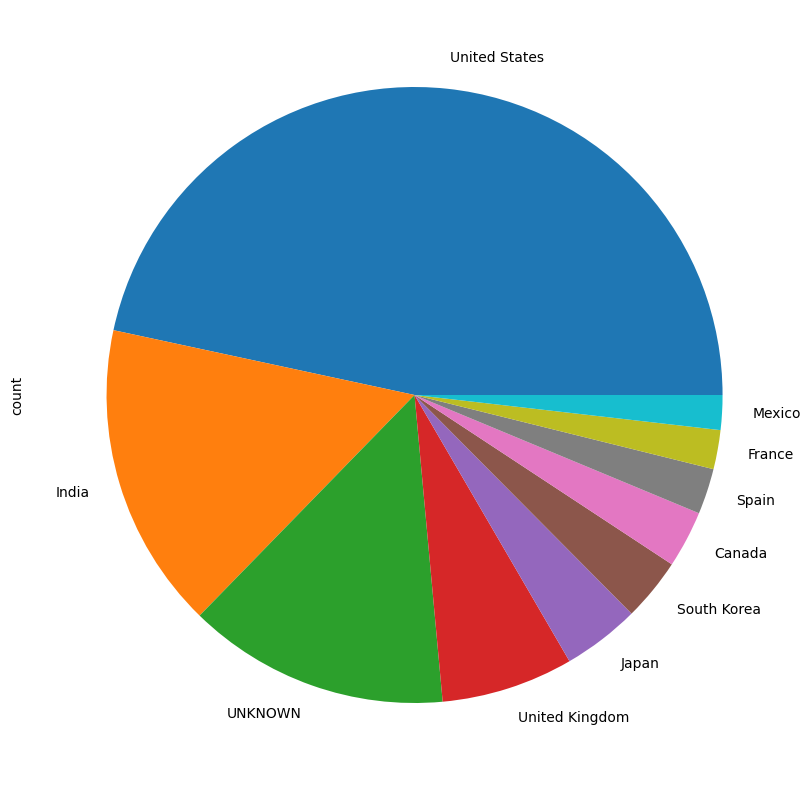

In [102]:
datasets["country"].value_counts()[:10].plot.pie(figsize=(10,10))